In [258]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

Let `X` be a categorical variable, `size`, and `Y` be a continuous variable, `price`.

In [259]:
sample_size = 1000

### Marginal $X \longrightarrow p(X)$

In [260]:
X = np.array([
    ['XS'] * int(sample_size / 5),
    ['S'] * int(sample_size / 5),
    ['M'] * int(sample_size / 5),
    ['L'] * int(sample_size / 5),
    ['XL'] * int(sample_size / 5),
]).flatten()

In [261]:
np.unique(X, return_counts=True)

(array(['L', 'M', 'S', 'XL', 'XS'], dtype='<U2'),
 array([200, 200, 200, 200, 200]))

In [262]:
np.unique(X, return_counts=True)

(array(['L', 'M', 'S', 'XL', 'XS'], dtype='<U2'),
 array([200, 200, 200, 200, 200]))

In [263]:
def marginal_X(X, sample_size):
    X_unique_counts = np.unique(X, return_counts=True)
    p_X = {val: count / sample_size for val, count in zip(X_unique_counts[0], X_unique_counts[1])}
    return p_X

In [264]:
p_X = marginal_X(X, sample_size)
p_X

{'L': 0.2, 'M': 0.2, 'S': 0.2, 'XL': 0.2, 'XS': 0.2}

### Marginal $Y \longrightarrow p(Y)$

In [265]:
Y = np.linspace(start=5, stop=35, num=sample_size) + np.random.random(sample_size)

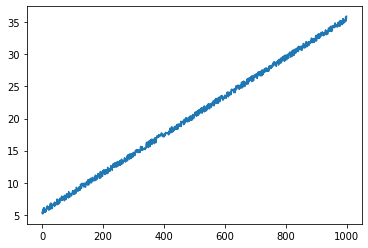

In [266]:
plt.plot(Y)

In [325]:
def marginal_Y(Y, sample_size, num_bins=None):
    if num_bins is None:
        num_bins = int(np.sqrt(sample_size / 5))
    Y_hist = np.histogram(Y, bins=num_bins, range=(Y.min(), Y.max()))
    p_Y= {}
    for idx, (count, edge) in enumerate(zip(Y_hist[0], Y_hist[1])):
        p_Y[(Y_hist[1][idx], Y_hist[1][idx + 1])] = count / sample_size
    return p_Y

In [390]:
p_Y = marginal_Y(Y, sample_size, num_bins=None)
p_Y

{(5.148912859534579, 7.346953545759664): 0.061,
 (7.346953545759664, 9.544994231984749): 0.073,
 (9.544994231984749, 11.743034918209833): 0.076,
 (11.743034918209833, 13.941075604434918): 0.073,
 (13.941075604434918, 16.139116290660002): 0.072,
 (16.139116290660002, 18.33715697688509): 0.078,
 (18.33715697688509, 20.535197663110175): 0.07,
 (20.535197663110175, 22.73323834933526): 0.071,
 (22.73323834933526, 24.931279035560344): 0.072,
 (24.931279035560344, 27.12931972178543): 0.073,
 (27.12931972178543, 29.327360408010513): 0.078,
 (29.327360408010513, 31.5254010942356): 0.071,
 (31.5254010942356, 33.72344178046068): 0.077,
 (33.72344178046068, 35.92148246668577): 0.055}

### Joint Distribution $\longrightarrow p(X, Y)$

In [391]:
def get_Y_bins(Y, p_Y):
    Y_bins = []
    for y in Y:
        for key in list(p_Y.keys()):
            if (y >= key[0]) and (y <= key[1]):
                Y_bins.append(key)
    return Y_bins


def create_joint_observations(X, Y, p_X, p_Y):
    Y_bins = get_Y_bins(Y, p_Y)
    XYs = []
    for x, y in zip(X, Y_bins):
        XYs.append((x, y))
    return pd.Series(XYs)


def joint_X_Y(X, Y, p_X, p_Y, sample_size):
    XYs = create_joint_observations(X, Y, p_X, p_Y)
    p_X_Y = dict(pd.Series(XYs).value_counts() / sample_size)
    return p_X_Y

In [392]:
p_X_Y = joint_X_Y(X, Y, p_X, p_Y, sample_size)

In [393]:
p_X_Y

{('XL', (31.5254010942356, 33.72344178046068)): 0.077,
 ('L', (27.12931972178543, 29.327360408010513)): 0.076,
 ('XS', (7.346953545759664, 9.544994231984749)): 0.073,
 ('L', (24.931279035560344, 27.12931972178543)): 0.073,
 ('S', (13.941075604434918, 16.139116290660002)): 0.072,
 ('S', (11.743034918209833, 13.941075604434918)): 0.072,
 ('M', (20.535197663110175, 22.73323834933526)): 0.071,
 ('M', (18.33715697688509, 20.535197663110175)): 0.07,
 ('XL', (29.327360408010513, 31.5254010942356)): 0.066,
 ('XS', (9.544994231984749, 11.743034918209833)): 0.065,
 ('XS', (5.148912859534579, 7.346953545759664)): 0.061,
 ('XL', (33.72344178046068, 35.92148246668577)): 0.055,
 ('L', (22.73323834933526, 24.931279035560344)): 0.046,
 ('S', (16.139116290660002, 18.33715697688509)): 0.045,
 ('M', (16.139116290660002, 18.33715697688509)): 0.033,
 ('M', (22.73323834933526, 24.931279035560344)): 0.026,
 ('S', (9.544994231984749, 11.743034918209833)): 0.011,
 ('L', (29.327360408010513, 31.5254010942356)):

In [394]:
def create_base_joint_dist_of_zeros(p_X, p_Y):
    indep_p_X_Y = {}
    for x, p_x in p_X.items():
        for y, p_y in p_Y.items():
            indep_p_X_Y[(x, y)] = 0
    return indep_p_X_Y

In [395]:
base_joint_dist_of_zeros = create_base_joint_dist_of_zeros(p_X, p_Y)
base_joint_dist_of_zeros.update(p_X_Y)
p_X_Y = base_joint_dist_of_zeros
p_X_Y

{('L', (5.148912859534579, 7.346953545759664)): 0,
 ('L', (7.346953545759664, 9.544994231984749)): 0,
 ('L', (9.544994231984749, 11.743034918209833)): 0,
 ('L', (11.743034918209833, 13.941075604434918)): 0,
 ('L', (13.941075604434918, 16.139116290660002)): 0,
 ('L', (16.139116290660002, 18.33715697688509)): 0,
 ('L', (18.33715697688509, 20.535197663110175)): 0,
 ('L', (20.535197663110175, 22.73323834933526)): 0,
 ('L', (22.73323834933526, 24.931279035560344)): 0.046,
 ('L', (24.931279035560344, 27.12931972178543)): 0.073,
 ('L', (27.12931972178543, 29.327360408010513)): 0.076,
 ('L', (29.327360408010513, 31.5254010942356)): 0.005,
 ('L', (31.5254010942356, 33.72344178046068)): 0,
 ('L', (33.72344178046068, 35.92148246668577)): 0,
 ('M', (5.148912859534579, 7.346953545759664)): 0,
 ('M', (7.346953545759664, 9.544994231984749)): 0,
 ('M', (9.544994231984749, 11.743034918209833)): 0,
 ('M', (11.743034918209833, 13.941075604434918)): 0,
 ('M', (13.941075604434918, 16.139116290660002)): 0,


### Joint Distribution if independent (mutual information = 0) $\longrightarrow p(X)p(Y)$
Want to make sure that I am not making a mistake here!!!!

In [396]:
def independent_joint_X_Y(p_X, p_Y):
    indep_p_X_Y = {}
    for x, p_x in p_X.items():
        for y, p_y in p_Y.items():
            indep_p_X_Y[(x, y)] = p_x * p_y
    return indep_p_X_Y

In [397]:
indep_p_X_Y = independent_joint_X_Y(p_X, p_Y)
indep_p_X_Y

{('L', (5.148912859534579, 7.346953545759664)): 0.0122,
 ('L', (7.346953545759664, 9.544994231984749)): 0.0146,
 ('L', (9.544994231984749, 11.743034918209833)): 0.0152,
 ('L', (11.743034918209833, 13.941075604434918)): 0.0146,
 ('L', (13.941075604434918, 16.139116290660002)): 0.0144,
 ('L', (16.139116290660002, 18.33715697688509)): 0.015600000000000001,
 ('L', (18.33715697688509, 20.535197663110175)): 0.014000000000000002,
 ('L', (20.535197663110175, 22.73323834933526)): 0.014199999999999999,
 ('L', (22.73323834933526, 24.931279035560344)): 0.0144,
 ('L', (24.931279035560344, 27.12931972178543)): 0.0146,
 ('L', (27.12931972178543, 29.327360408010513)): 0.015600000000000001,
 ('L', (29.327360408010513, 31.5254010942356)): 0.014199999999999999,
 ('L', (31.5254010942356, 33.72344178046068)): 0.0154,
 ('L', (33.72344178046068, 35.92148246668577)): 0.011000000000000001,
 ('M', (5.148912859534579, 7.346953545759664)): 0.0122,
 ('M', (7.346953545759664, 9.544994231984749)): 0.0146,
 ('M', (9.

In [398]:
def mutual_information(X, Y, p_X, p_Y, p_X_Y, indep_p_X_Y):
    x_vals = np.unique(X)
    y_vals = list(p_Y.keys())
    
    mutual_inf = 0
    for x in x_vals:
        for y in y_vals:
#             print(np.log(p_X_Y[(x, y)] / indep_p_X_Y[(x, y)]))
            if p_X_Y[(x, y)] != 0:
                mutual_inf += p_X_Y[(x, y)] * np.log(p_X_Y[(x, y)] / indep_p_X_Y[(x, y)])
    return mutual_inf

In [399]:
mutual_information(X, Y, p_X, p_Y, p_X_Y, indep_p_X_Y)

1.445112818232906

In [400]:
def entropy(p_X):
    entropy = 0
    for p_x in p_X.values():
        entropy += p_x * np.log(1 / p_x)  
    return entropy

In [401]:
entropy(p_X)

1.6094379124341005

In [402]:
entropy(p_Y)

2.6351875715385766

In [403]:
def normalized_information_distance(X, Y, p_X, p_Y, p_X_Y, indep_p_X_Y):
    return 1 - (mutual_information(X, Y, p_X, p_Y, p_X_Y, indep_p_X_Y) / max(entropy(p_X), entropy(p_Y)))

In [376]:
normalized_information_distance(X, Y, p_X, p_Y, p_X_Y, indep_p_X_Y)

0.45160912496670413

### Try `entropy_estimators` package

In [405]:
import warnings

import numpy as np
import numpy.linalg as la
from numpy import log
from scipy.special import digamma
from sklearn.neighbors import BallTree, KDTree

# CONTINUOUS ESTIMATORS


def entropy(x, k=3, base=2):
    """ The classic K-L k-nearest neighbor continuous entropy estimator
        x should be a list of vectors, e.g. x = [[1.3], [3.7], [5.1], [2.4]]
        if x is a one-dimensional scalar and we have four samples
    """
    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    x = np.asarray(x)
    n_elements, n_features = x.shape
    x = add_noise(x)
    tree = build_tree(x)
    nn = query_neighbors(tree, x, k)
    const = digamma(n_elements) - digamma(k) + n_features * log(2)
    return (const + n_features * np.log(nn).mean()) / log(base)


def centropy(x, y, k=3, base=2):
    """ The classic K-L k-nearest neighbor continuous entropy estimator for the
        entropy of X conditioned on Y.
    """
    xy = np.c_[x, y]
    entropy_union_xy = entropy(xy, k=k, base=base)
    entropy_y = entropy(y, k=k, base=base)
    return entropy_union_xy - entropy_y


def tc(xs, k=3, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    entropy_features = [entropy(col, k=k, base=base) for col in xs_columns]
    return np.sum(entropy_features) - entropy(xs, k, base)


def ctc(xs, y, k=3, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    centropy_features = [centropy(col, y, k=k, base=base)
                         for col in xs_columns]
    return np.sum(centropy_features) - centropy(xs, y, k, base)


def corex(xs, ys, k=3, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    cmi_features = [mi(col, ys, k=k, base=base) for col in xs_columns]
    return np.sum(cmi_features) - mi(xs, ys, k=k, base=base)


def mi(x, y, z=None, k=3, base=2, alpha=0):
    """ Mutual information of x and y (conditioned on z if z is not None)
        x, y should be a list of vectors, e.g. x = [[1.3], [3.7], [5.1], [2.4]]
        if x is a one-dimensional scalar and we have four samples
    """
    assert len(x) == len(y), "Arrays should have same length"
    assert k <= len(x) - 1, "Set k smaller than num. samples - 1"
    x, y = np.asarray(x), np.asarray(y)
    x, y = x.reshape(x.shape[0], -1), y.reshape(y.shape[0], -1)
    x = add_noise(x)
    y = add_noise(y)
    points = [x, y]
    if z is not None:
        z = np.asarray(z)
        z = z.reshape(z.shape[0], -1)
        points.append(z)
    points = np.hstack(points)
    # Find nearest neighbors in joint space, p=inf means max-norm
    tree = build_tree(points)
    dvec = query_neighbors(tree, points, k)
    if z is None:
        a, b, c, d = avgdigamma(x, dvec), avgdigamma(
            y, dvec), digamma(k), digamma(len(x))
        if alpha > 0:
            d += lnc_correction(tree, points, k, alpha)
    else:
        xz = np.c_[x, z]
        yz = np.c_[y, z]
        a, b, c, d = avgdigamma(xz, dvec), avgdigamma(
            yz, dvec), avgdigamma(z, dvec), digamma(k)
    return (-a - b + c + d) / log(base)


def cmi(x, y, z, k=3, base=2):
    """ Mutual information of x and y, conditioned on z
        Legacy function. Use mi(x, y, z) directly.
    """
    return mi(x, y, z=z, k=k, base=base)


def kldiv(x, xp, k=3, base=2):
    """ KL Divergence between p and q for x~p(x), xp~q(x)
        x, xp should be a list of vectors, e.g. x = [[1.3], [3.7], [5.1], [2.4]]
        if x is a one-dimensional scalar and we have four samples
    """
    assert k < min(len(x), len(xp)), "Set k smaller than num. samples - 1"
    assert len(x[0]) == len(xp[0]), "Two distributions must have same dim."
    x, xp = np.asarray(x), np.asarray(xp)
    x, xp = x.reshape(x.shape[0], -1), xp.reshape(xp.shape[0], -1)
    d = len(x[0])
    n = len(x)
    m = len(xp)
    const = log(m) - log(n - 1)
    tree = build_tree(x)
    treep = build_tree(xp)
    nn = query_neighbors(tree, x, k)
    nnp = query_neighbors(treep, x, k - 1)
    return (const + d * (np.log(nnp).mean() - np.log(nn).mean())) / log(base)


def lnc_correction(tree, points, k, alpha):
    e = 0
    n_sample = points.shape[0]
    for point in points:
        # Find k-nearest neighbors in joint space, p=inf means max norm
        knn = tree.query(point[None, :], k=k+1, return_distance=False)[0]
        knn_points = points[knn]
        # Substract mean of k-nearest neighbor points
        knn_points = knn_points - knn_points[0]
        # Calculate covariance matrix of k-nearest neighbor points, obtain eigen vectors
        covr = knn_points.T @ knn_points / k
        _, v = la.eig(covr)
        # Calculate PCA-bounding box using eigen vectors
        V_rect = np.log(np.abs(knn_points @ v).max(axis=0)).sum()
        # Calculate the volume of original box
        log_knn_dist = np.log(np.abs(knn_points).max(axis=0)).sum()

        # Perform local non-uniformity checking and update correction term
        if V_rect < log_knn_dist + np.log(alpha):
            e += (log_knn_dist - V_rect) / n_sample
    return e


# DISCRETE ESTIMATORS
def entropyd(sx, base=2):
    """ Discrete entropy estimator
        sx is a list of samples
    """
    unique, count = np.unique(sx, return_counts=True, axis=0)
    # Convert to float as otherwise integer division results in all 0 for proba.
    proba = count.astype(float) / len(sx)
    # Avoid 0 division; remove probabilities == 0.0 (removing them does not change the entropy estimate as 0 * log(1/0) = 0.
    proba = proba[proba > 0.0]
    return np.sum(proba * np.log(1. / proba)) / log(base)


def midd(x, y, base=2):
    """ Discrete mutual information estimator
        Given a list of samples which can be any hashable object
    """
    assert len(x) == len(y), "Arrays should have same length"
    return entropyd(x, base) - centropyd(x, y, base)


def cmidd(x, y, z, base=2):
    """ Discrete mutual information estimator
        Given a list of samples which can be any hashable object
    """
    assert len(x) == len(y) == len(z), "Arrays should have same length"
    xz = np.c_[x, z]
    yz = np.c_[y, z]
    xyz = np.c_[x, y, z]
    return entropyd(xz, base) + entropyd(yz, base) - entropyd(xyz, base) - entropyd(z, base)


def centropyd(x, y, base=2):
    """ The classic K-L k-nearest neighbor continuous entropy estimator for the
        entropy of X conditioned on Y.
    """
    xy = np.c_[x, y]
    return entropyd(xy, base) - entropyd(y, base)


def tcd(xs, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    entropy_features = [entropyd(col, base=base) for col in xs_columns]
    return np.sum(entropy_features) - entropyd(xs, base)


def ctcd(xs, y, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    centropy_features = [centropyd(col, y, base=base) for col in xs_columns]
    return np.sum(centropy_features) - centropyd(xs, y, base)


def corexd(xs, ys, base=2):
    xs_columns = np.expand_dims(xs, axis=0).T
    cmi_features = [midd(col, ys, base=base) for col in xs_columns]
    return np.sum(cmi_features) - midd(xs, ys, base)


# MIXED ESTIMATORS
def micd(x, y, k=3, base=2, warning=True):
    """ If x is continuous and y is discrete, compute mutual information
    """
    assert len(x) == len(y), "Arrays should have same length"
    entropy_x = entropy(x, k, base)

    y_unique, y_count = np.unique(y, return_counts=True, axis=0)
    y_proba = y_count / len(y)

    entropy_x_given_y = 0.
    for yval, py in zip(y_unique, y_proba):
        x_given_y = x[(y == yval).all(axis=1)]
        if k <= len(x_given_y) - 1:
            entropy_x_given_y += py * entropy(x_given_y, k, base)
        else:
            if warning:
                warnings.warn("Warning, after conditioning, on y={yval} insufficient data. "
                              "Assuming maximal entropy in this case.".format(yval=yval))
            entropy_x_given_y += py * entropy_x
    return abs(entropy_x - entropy_x_given_y)  # units already applied


def midc(x, y, k=3, base=2, warning=True):
    return micd(y, x, k, base, warning)


def centropycd(x, y, k=3, base=2, warning=True):
    return entropy(x, base) - micd(x, y, k, base, warning)


def centropydc(x, y, k=3, base=2, warning=True):
    return centropycd(y, x, k=k, base=base, warning=warning)


def ctcdc(xs, y, k=3, base=2, warning=True):
    xs_columns = np.expand_dims(xs, axis=0).T
    centropy_features = [centropydc(
        col, y, k=k, base=base, warning=warning) for col in xs_columns]
    return np.sum(centropy_features) - centropydc(xs, y, k, base, warning)


def ctccd(xs, y, k=3, base=2, warning=True):
    return ctcdc(y, xs, k=k, base=base, warning=warning)


def corexcd(xs, ys, k=3, base=2, warning=True):
    return corexdc(ys, xs, k=k, base=base, warning=warning)


def corexdc(xs, ys, k=3, base=2, warning=True):
    return tcd(xs, base) - ctcdc(xs, ys, k, base, warning)


# UTILITY FUNCTIONS

def add_noise(x, intens=1e-10):
    # small noise to break degeneracy, see doc.
    return x + intens * np.random.random_sample(x.shape)


def query_neighbors(tree, x, k):
    return tree.query(x, k=k + 1)[0][:, k]


def count_neighbors(tree, x, r):
    return tree.query_radius(x, r, count_only=True)


def avgdigamma(points, dvec):
    # This part finds number of neighbors in some radius in the marginal space
    # returns expectation value of <psi(nx)>
    tree = build_tree(points)
    dvec = dvec - 1e-15
    num_points = count_neighbors(tree, points, dvec)
    return np.mean(digamma(num_points))


def build_tree(points):
    if points.shape[1] >= 20:
        return BallTree(points, metric='chebyshev')
    return KDTree(points, metric='chebyshev')

# TESTS


def shuffle_test(measure, x, y, z=False, ns=200, ci=0.95, **kwargs):
    """ Shuffle test
        Repeatedly shuffle the x-values and then estimate measure(x, y, [z]).
        Returns the mean and conf. interval ('ci=0.95' default) over 'ns' runs.
        'measure' could me mi, cmi, e.g. Keyword arguments can be passed.
        Mutual information and CMI should have a mean near zero.
    """
    x_clone = np.copy(x)  # A copy that we can shuffle
    outputs = []
    for i in range(ns):
        np.random.shuffle(x_clone)
        if z:
            outputs.append(measure(x_clone, y, z, **kwargs))
        else:
            outputs.append(measure(x_clone, y, **kwargs))
    outputs.sort()
    return np.mean(outputs), (outputs[int((1. - ci) / 2 * ns)], outputs[int((1. + ci) / 2 * ns)])

In [424]:
micd(np.asmatrix(Y).T, np.asmatrix(X).T)

2.2152250811705496

## Implement many KS Tests on slices of data (sliced by categorical)

In [428]:
from scipy.stats import ks_2samp

In [444]:
def create_masks(X):
    masks = {}
    for x in np.unique(X):
        masks[x] = X == x
    return masks

In [445]:
masks = create_masks(X)

In [446]:
len(masks)

5

In [449]:
Y_subsets = {x: Y[mask] for x, mask in masks.items()}

In [457]:
ks_results = {}
for x1, y1 in Y_subsets.items():
    for x2, y2 in Y_subsets.items():
        if x1 != x2:
            ks_results[(x1, x2)] = ks_2samp(y1, y2).statistic
    

In [461]:
np.array(list(ks_results.values())).mean()

0.9869999999999999

## Nearest Neighbor Method
See link [here](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0087357&type=printable).

In [473]:
i = 100
k = 3
Y_subsets['L'][i]

26.873035594784582

In [483]:
def find_k_closest_neighbors(X, idx, k=3):
    x = X[idx]
    distances = np.abs(x - X)
    distances_sorted = np.argsort(distances)
    return distances_sorted[:k]

In [484]:
find_k_closest_neighbors(Y_subsets['L'], 100)

array([100, 126, 124])

In [488]:
def find_d_to_k_closest_neighbor(X, idx, k=3):
    k_closest_neighbors = find_k_closest_neighbors(X, idx, k=k)
    kth_closest_neighbor = k_closest_neighbors[-1]
    d = np.abs(X[idx] - X[kth_closest_neighbor])
    return d

In [503]:
d = find_d_to_k_closest_neighbor(Y_subsets['L'], 100)
d

0.0399970753016774

In [493]:
Y_subsets['L'][i]

26.873035594784582

In [500]:
global_idx = np.where(Y == 26.873035594784582)[0][0]

In [510]:
Y[global_idx] - d

26.833038519482905

In [509]:
Y[global_idx] + d

26.91303267008626

In [537]:
def number_of_neighbors_in_full_data_in_range_d(X, d, global_idx):
    return np.where(
        (X >= X[global_idx] - d) &
        (X <= X[global_idx] + d)
    )

In [538]:
mi = len(number_of_neighbors_in_full_data_in_range_d(Y, d, global_idx)[0])
mi

3

In [520]:
N_xi = len(Y_subsets['L'])

In [521]:
N_xi

200

In [522]:
from scipy.special import digamma

In [525]:
def single_mutual_information(N, N_xi, k, mi):
    return (
        digamma(N) - digamma(N_xi) + digamma(k) - digamma(mi)
    )

In [526]:
single_mutual_information(1000, N_xi, k, mi)

1.6114399124289012

In [599]:
def mutual_information_based_on_nearest_neighbors(X, Y, k=3):
    X = pd.Series(X)
    Y = pd.Series(Y)
    
    N = X.shape[0]
    mutual_infs = 0
    
    # Iterate over all data points
    for data_point_idx in range(0, X.shape[0]):
        
        # Find kth closest neighbor to i among data points with same discrete value as data point i
        # Find distance to kth closest neighbor
        discrete_type = X[data_point_idx]
        indices_of_discrete_type = X[X == discrete_type].index
        N_xi = len(indices_of_discrete_type)
        Y_values_where_x_is_discrete_type = Y[indices_of_discrete_type]
        
        y = Y[data_point_idx]
        distances = np.abs(y - Y_values_where_x_is_discrete_type)
        distances_sorted = distances.sort_values()
        k_closest_neighbors = distances_sorted[1:k+1]

        kth_closest_neighbor = k_closest_neighbors.tail(1)
        
        dist = np.abs(Y[data_point_idx] - Y[kth_closest_neighbor.index]).values[0]

        # Count num neighbors in full data set lying with in distance d to point i
        mi = ((Y >= Y[data_point_idx] - dist) & (Y <= Y[data_point_idx] + dist)).sum()
        
    
        I_i = single_mutual_information(N, N_xi, k, mi)
        mutual_infs += I_i
        
        if data_point_idx == 100:
            print(I_i)
        
    average_mutual_information = mutual_infs / N
        
    
    return average_mutual_information

In [600]:
%%time
average_mutual_information = mutual_information_based_on_nearest_neighbors(X, Y)

1.2781065790955681
CPU times: user 3.96 s, sys: 14.4 ms, total: 3.98 s
Wall time: 3.98 s


In [598]:
average_mutual_information

1.216457007784938